# Setup

In [2]:
import sys
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install rsatoolbox
!{sys.executable} -m pip install pyexcel_ods
!{sys.executable} -m pip install mne
import mne
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pathlib
import pandas as pd
import numpy as np
import seaborn as sns
import configparser
import scipy
import scipy.io 
from scipy.io import loadmat
from scipy.spatial.distance import pdist, squareform
import json
from PIL import Image
import mne
import pyexcel_ods
from pyexcel_ods import get_data 
import rsatoolbox as rsa
import rsatoolbox.data as rsa_data
import rsatoolbox.rdm as rdm
import rsatoolbox.vis as vis
import rsatoolbox.io as io
from rsatoolbox.io import meadows
from rsatoolbox.vis import rdm_plot
from rsatoolbox.rdm import rdms

In [3]:
#matplotlib.use('Qt5Agg') # use Qt5Agg backend = best choice for MNE-Python's interactive plotting functions

In [4]:
#help(rsa)

# Analysis of data 

In [5]:
filepath = r"C:\Users\TKS086\Audio-visual_similarity-main\data\participants.tsv"
df_particpants = pd.read_csv(filepath, sep="\t") 
a = df_particpants.values
df_particpants # has information regarding head circumference

,participant_id,head_circumference
0,pilot0,NaN
1,pilot1,NaN
2,pilot2,NaN
3,pilot3,59.0
4,01,NaN
5,02,NaN
6,03,NaN
7,04,NaN
8,05,NaN


In [6]:
#filepath = r"C:\Users\TKS086\Audio-visual_similarity-main\data\sub-01_ses-05_scans.tsv"
#df = pd.read_csv(filepath, sep="\t") 
#a = df.values

In [7]:
#filepath = r"C:\Users\TKS086\Audio-visual_similarity-main\data\sub-01_ses-06_scans.tsv"
#df = pd.read_csv(filepath, sep="\t") 
#a = df.values

In [8]:
#filepath = r"C:\Users\TKS086\Audio-visual_similarity-main\data\sub-01_ses-07_scans.tsv"
#df = pd.read_csv(filepath, sep="\t") 
#a = df.values

In [9]:
#filepath = r"C:\Users\TKS086\Audio-visual_similarity-main\data\sub-01_ses-08_scans.tsv"
#df = pd.read_csv(filepath, sep="\t") 
#a = df.values

In [10]:
# filepath = r"C:\Users\TKS086\Audio-visual_similarity-main\data\sub-01_ses-09_scans.tsv"
# df = pd.read_csv(filepath, sep="\t") 
# a = df.values

In [11]:
# filepath = r"C:\Users\TKS086\Audio-visual_similarity-main\data\sub-01_ses-10_scans.tsv"
# df = pd.read_csv(filepath, sep="\t") 
# a = df.values

In [12]:
filepath = r"C:\Users\TKS086\Audio-visual_similarity-main\data\nback.tsv"
df_nback = pd.read_csv(filepath, sep="\t") 
a = df_nback.values
df_nback = df_nback.drop(['run', 'session', 'datetime'], axis=1) # drop coloumns 
df_nback = df_nback.rename({'subject' : 'participant_id'}, axis = 1)
df_nback = pd.merge(df_nback, df_particpants)  # merge with participant info
df_nback

,participant_id,n_targets,hits,false_alarms,rt,keys,head_circumference
0,01,10,10,3,2.205460,num_add=13,NaN
1,01,10,9,2,2.060333,num_add=11,NaN
2,01,10,9,0,1.686978,num_add=9,NaN
3,01,10,6,2,1.767783,num_add=8,NaN
4,01,10,8,0,1.634375,"num_add=8, f6=1",NaN
...,...,...,...,...,...,...,...
262,pilot3,10,9,0,2.537833,num_add=9,59.0
263,pilot3,10,9,0,1.205478,num_add=9,59.0
264,pilot3,10,8,0,1.451775,num_add=8,59.0
265,pilot3,10,10,0,1.824880,num_add=10,59.0


In [13]:
sub1df = df_nback.loc[df_nback['participant_id'] == '01'] #subject 1

In [14]:
filepath = r"C:\Users\TKS086\Audio-visual_similarity-main\data\Meadows_avima-audio-version1_v_v2_secure-kit_2_events.log.tsv"
sub1 = pd.read_csv(filepath, sep="\t") 
a = sub1.values
sub1 = sub1.drop(['logStarted'], axis = 1)
sub1

,1567513886687,{}
0,1567513886687,"{'w': 1920, 'h': 1080}"
1,1567513886688,"{'w': 1853, 'h': 885.328125}"
2,1567514029353,"{'w': 1920, 'h': 974.6875}"
3,1567514047302,"{'y': -0.3799515981009865, 'cat': '', 'x': 0.0..."
4,1567514050405,"{'y': -0.8383082333968689, 'cat': '', 'x': -0...."
...,...,...
1435,1567516607547,"{'y': -0.510325622694293, 'cat': '', 'x': -0.1..."
1436,1567516609114,"{'y': 0.18160455157696875, 'cat': '', 'x': 0.5..."
1437,1567516611033,"{'y': -0.004344210018284718, 'cat': '', 'x': 0..."
1438,1567516612569,"{'y': 0.413425042076587, 'cat': '', 'x': 0.123..."


In [15]:
sub2df = df_nback.loc[df_nback['participant_id'] == '02'] # subject 2 

In [16]:
sub3df = df_nback.loc[df_nback['participant_id'] == '03'] # subject 3

In [17]:
sub4df = df_nback.loc[df_nback['participant_id'] == '04'] # subject 4

In [18]:
sub5df = df_nback.loc[df_nback['participant_id'] == '05'] # subject 5

In [19]:
pil0df = df_nback.loc[df_nback['participant_id'] == 'pilot0'] # pilot study 0

In [20]:
pil1df = df_nback.loc[df_nback['participant_id'] == 'pilot1'] # pilot study 1

In [21]:
pil2df = df_nback.loc[df_nback['participant_id'] == 'pilot2'] # pilot study 2

In [22]:
pil3df = df_nback.loc[df_nback['participant_id'] == 'pilot3'] # pilot study 3

# Subject 1 

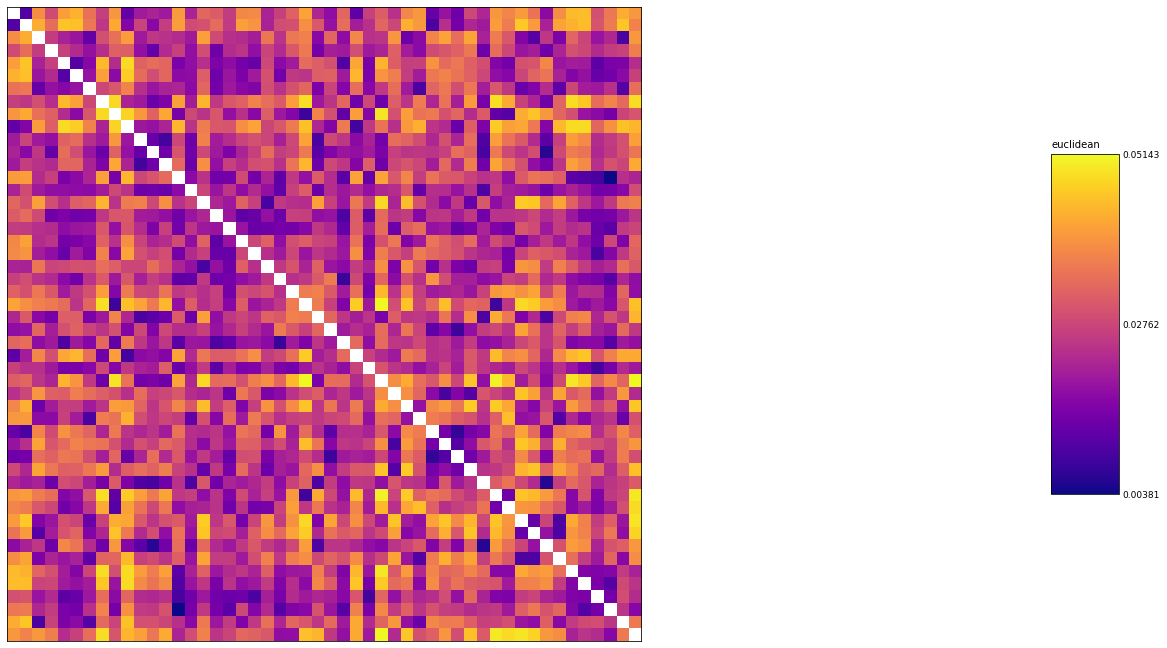

In [23]:
# subject 1 - audio 
sub1_audio = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-audio-version1_v_v2_secure-kit_2_1D.mat"
securekit = scipy.io.loadmat(sub1_audio)
#print(securekit) # we can see rdmutv
#rdmutv = securekit["rdmutv"] #rdmutv is the upper triangle so create matrix
#euc_dist = rdmutv.T + rdmutv - np.diag(np.diag(rdmutv))
#np.fill_diagonal(euc_dist,0, wrap=False)

rdm_sub1_audio = rsa.io.meadows.load_rdms(sub1_audio)
fig,axis,_ = rsa.vis.show_rdm(rdm_sub1_audio, cmap = 'plasma', figsize=(25,25), show_colorbar="figure")

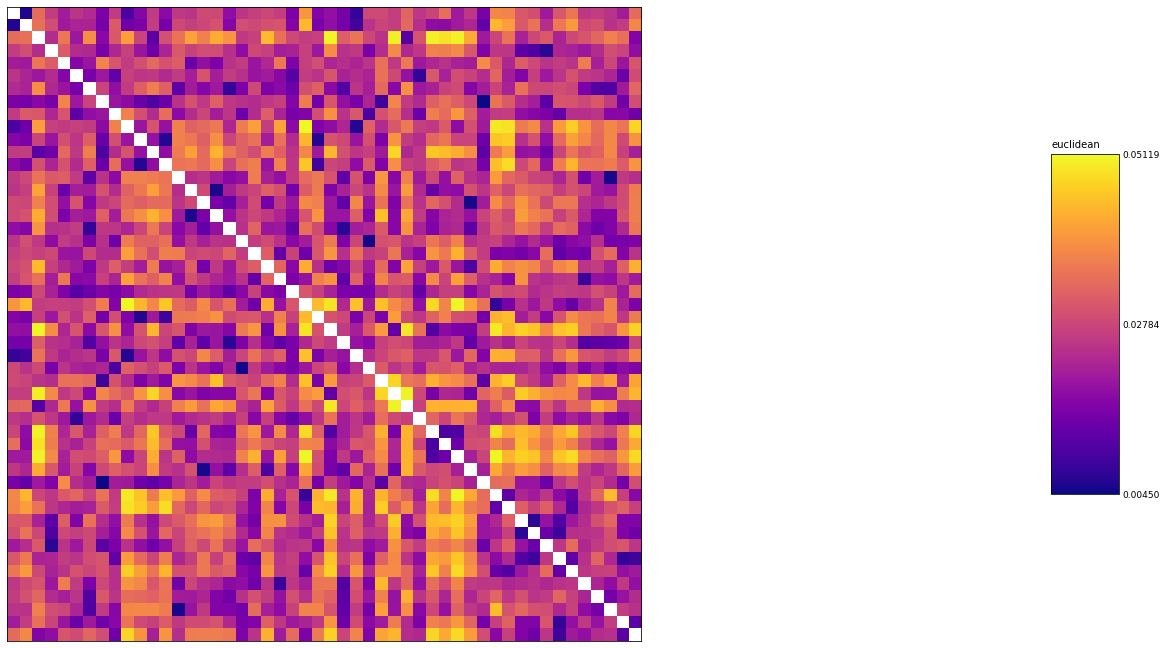

In [24]:
#subject 1 - image
sub1_img = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-image-version1_v_v2_vital-macaw_2_1D.mat"
rdm_sub1_img = rsa.io.meadows.load_rdms(sub1_img)
fig,axis,_ = rsa.vis.show_rdm(rdm_sub1_img, cmap = 'plasma', figsize=(25,25), show_colorbar="figure")

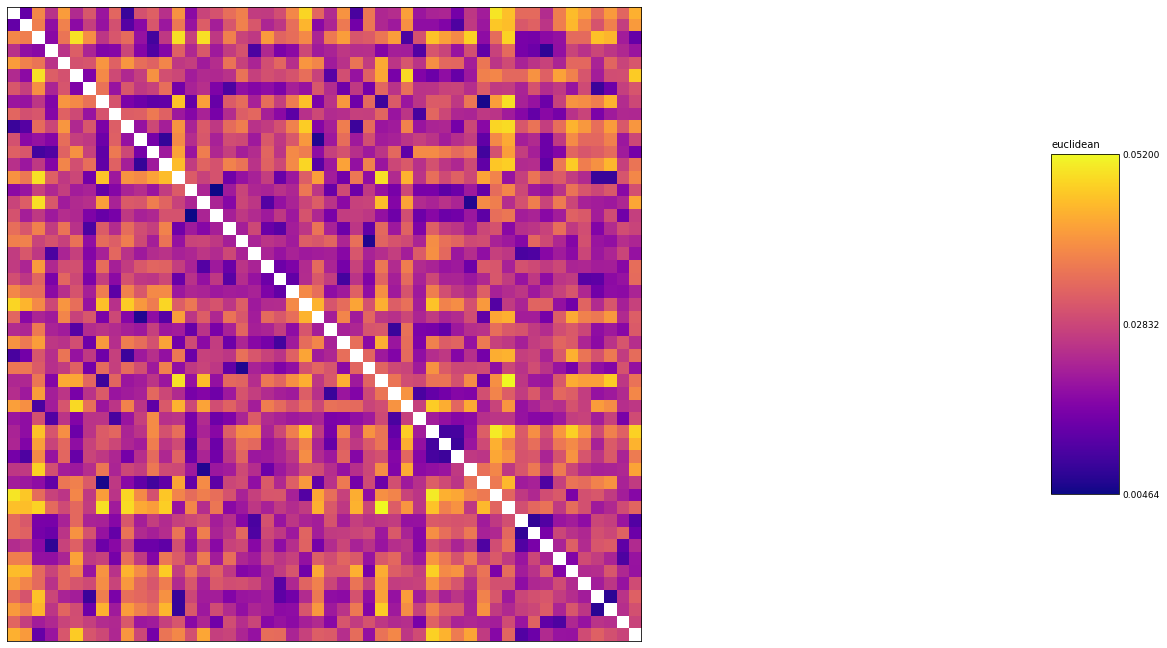

In [25]:
#subject 1 - mute video
sub1_mutevid = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-videomutesound-version1_v_v2_glad-owl_2_1D.mat"
rdm_sub1_mutevid = rsa.io.meadows.load_rdms(sub1_mutevid)
fig,axis,_ = rsa.vis.show_rdm(rdm_sub1_mutevid, cmap = 'plasma', figsize=(25,25), show_colorbar="figure")

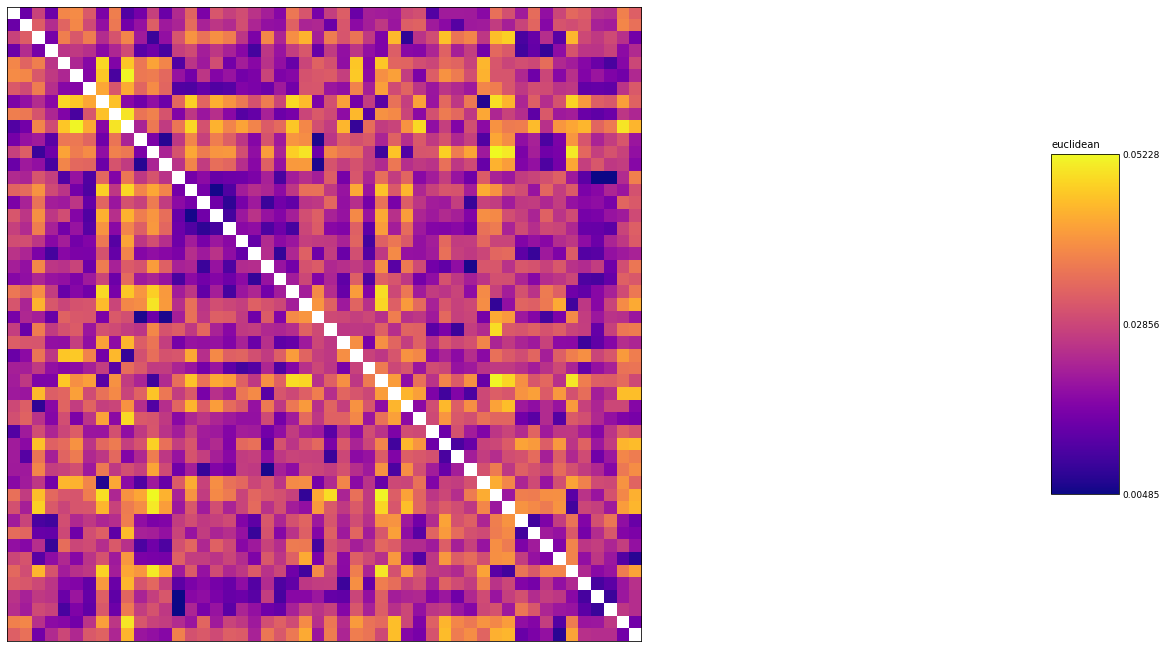

In [26]:
#subject 1 - video
sub1_vid = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-videowithsound-version1_v_v2_rested-dane_2_1D.mat"
rdm_sub1_vid = rsa.io.meadows.load_rdms(sub1_vid,True)
fig,axis,_ = rsa.vis.show_rdm(rdm_sub1_vid, cmap = 'plasma', figsize=(25,25), show_colorbar="figure")

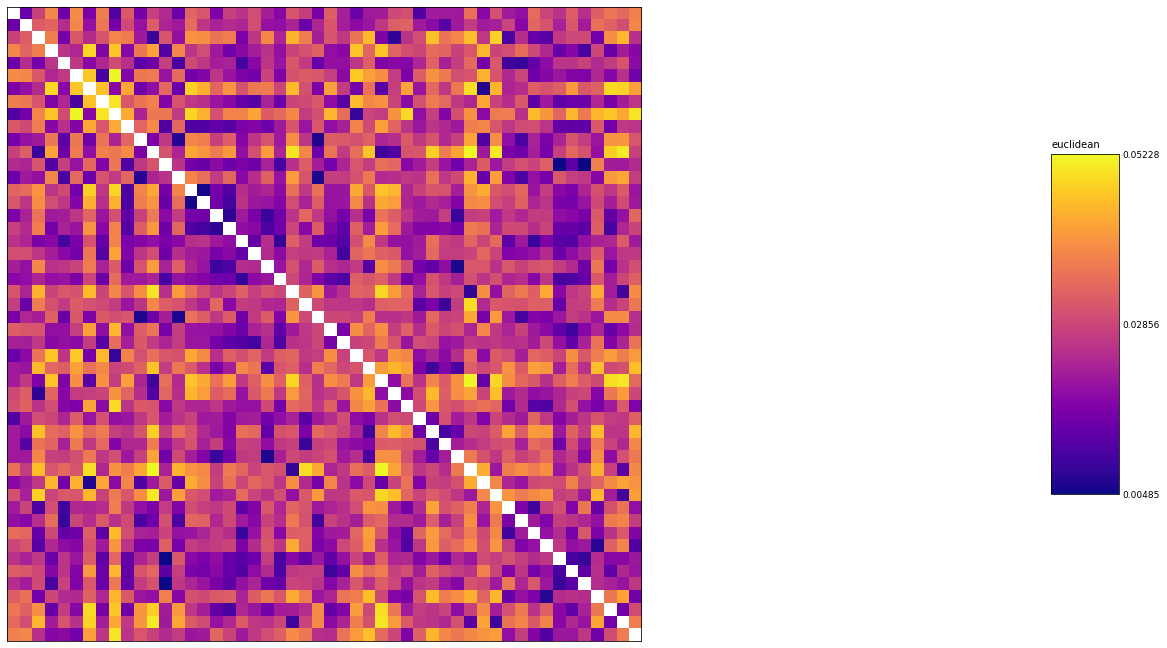

In [27]:
#subject 1 - video
sub1_vid = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-videowithsound-version1_v_v2_rested-dane_2_1D.mat"
rdm_sub1_vid = rsa.io.meadows.load_rdms(sub1_vid,False)
fig,axis,_ = rsa.vis.show_rdm(rdm_sub1_vid, cmap = 'plasma', figsize=(25,25), show_colorbar="figure")

# pearson correlations  

In [28]:
# we want to compare audio to video 
sub1_vidxaudio = rdm.compare_correlation(rdm_sub1_vid, rdm_sub1_audio)
# compare img to video 
sub1_vidximg = rdm.compare_correlation(rdm_sub1_vid, rdm_sub1_img)
# compare img to mute video
sub1_imgxmute = rdm.compare_correlation(rdm_sub1_img, rdm_sub1_mutevid)
#compare video to mute video
sub1_vidxmute = rdm.compare_correlation(rdm_sub1_vid, rdm_sub1_mutevid)
# compare audio to image/mute video 
sub1_audioximg = rdm.compare_correlation(rdm_sub1_audio, rdm_sub1_img)
sub1_audioxmute = rdm.compare_correlation(rdm_sub1_audio, rdm_sub1_mutevid)
# compare video with mute video 
sub1_vidxmute = rdm.compare_correlation(rdm_sub1_vid, rdm_sub1_mutevid)

# Subject 2 

In [29]:
sub2_audio = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-audio-version1_v_v1_famous-lizard_2_1D.mat"
rdm_sub2_audio = rsa.io.meadows.load_rdms(sub2_audio)

In [30]:
sub2_img = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-image-version1_v_v2_huge-falcon_2_1D.mat"
rdm_sub2_img = rsa.io.meadows.load_rdms(sub2_img)

In [31]:
sub2_mutevid = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-videomutesound-version1_v_v2_firm-cow_2_1D.mat"
rdm_sub2_mutevid = rsa.io.meadows.load_rdms(sub2_mutevid)

In [32]:
sub2_video = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-videowithsound-version1_v_v2_better-sawfly_2_1D.mat"
rdm_sub2_vid = rsa.io.meadows.load_rdms(sub2_video)

# pearson correlations  

In [33]:
# we want to compare audio to video 
sub2_vidxaudio = rdm.compare_correlation(rdm_sub2_vid, rdm_sub2_audio)
# compare img to video 
sub2_vidximg = rdm.compare_correlation(rdm_sub2_vid, rdm_sub2_img)
# compare img to mute video
sub2_imgxmute = rdm.compare_correlation(rdm_sub2_img, rdm_sub2_mutevid)
#compare video to mute video
sub2_vidxmute = rdm.compare_correlation(rdm_sub2_vid, rdm_sub2_mutevid)
# compare audio to image/mute video 
sub2_audioximg = rdm.compare_correlation(rdm_sub2_audio, rdm_sub2_img)
sub2_audioxmute = rdm.compare_correlation(rdm_sub2_audio, rdm_sub2_mutevid)
# compare video with mute video 
sub2_vidxmute = rdm.compare_correlation(rdm_sub2_vid, rdm_sub2_mutevid)

# subject 3 

In [34]:
sub3_audio = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-audio-version1_v_v2_huge-ferret_2_1D.mat"
rdm_sub3_audio = rsa.io.meadows.load_rdms(sub3_audio)

sub3_img = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-image-version1_v_v2_better-hound_2_1D.mat"
rdm_sub3_img = rsa.io.meadows.load_rdms(sub3_img)

sub3_mutevid = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-videomutesound-version1_v_v2_joint-swan_2_1D.mat"
rdm_sub3_mutevid = rsa.io.meadows.load_rdms(sub3_mutevid)

sub3_video = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-videowithsound-version1_v_v2_valued-dingo_2_1D.mat"
rdm_sub3_vid = rsa.io.meadows.load_rdms(sub3_video)

## pearson correlation

In [35]:
# we want to compare audio to video 
sub3_vidxaudio = rdm.compare_correlation(rdm_sub3_vid, rdm_sub3_audio)
# compare img to video 
sub3_vidximg = rdm.compare_correlation(rdm_sub3_vid, rdm_sub3_img)
# compare img to mute video
sub3_imgxmute = rdm.compare_correlation(rdm_sub3_img, rdm_sub3_mutevid)
#compare video to mute video
sub3_vidxmute = rdm.compare_correlation(rdm_sub3_vid, rdm_sub3_mutevid)
# compare audio to image/mute video 
sub3_audioximg = rdm.compare_correlation(rdm_sub3_audio, rdm_sub3_img)
sub3_audioxmute = rdm.compare_correlation(rdm_sub3_audio, rdm_sub3_mutevid)
# compare video with mute video 
sub3_vidxmute = rdm.compare_correlation(rdm_sub3_vid, rdm_sub3_mutevid)

# subject 4

In [36]:
sub4_audio = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-audio-version1_v_v2_novel-donkey_2_1D.mat"
rdm_sub4_audio = rsa.io.meadows.load_rdms(sub4_audio)

sub4_img = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-image-version1_v_v2_guided-koi_2_1D.mat"
rdm_sub4_img = rsa.io.meadows.load_rdms(sub4_img)

sub4_mute = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-videomutesound-version1_v_v2_sweet-rhino_2_1D.mat"
rdm_sub4_mute = rsa.io.meadows.load_rdms(sub4_mute)

sub4_video = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Meadows_avima-videowithsound-version1_v_v2_joint-elk_2_1D.mat"
rdm_sub4_vid = rsa.io.meadows.load_rdms(sub4_video)

## pearson correlation

In [37]:
# we want to compare audio to video 
sub4_vidxaudio = rdm.compare_correlation(rdm_sub4_vid, rdm_sub4_audio)
# compare img to video 
sub4_vidximg = rdm.compare_correlation(rdm_sub4_vid, rdm_sub4_img)
# compare img to mute video
sub4_imgxmute = rdm.compare_correlation(rdm_sub4_img, rdm_sub4_mute)
#compare video to mute video
sub4_vidxmute = rdm.compare_correlation(rdm_sub4_vid, rdm_sub4_mute)
# compare audio to image/mute video 
sub4_audioximg = rdm.compare_correlation(rdm_sub4_audio, rdm_sub4_img)
sub4_audioxmute = rdm.compare_correlation(rdm_sub4_audio, rdm_sub4_mute)
# compare video with mute video 
sub4_vidxmute = rdm.compare_correlation(rdm_sub4_vid, rdm_sub4_mute)

# subjects 5, sub-pilot 0 to 3

n/a

### take mean of subjects 1 to 4

In [38]:
# we want to compare audio to video 
vidxaudio = (sub1_vidxaudio[0][0] + sub2_vidxaudio[0][0] + sub3_vidxaudio[0][0] +sub4_vidxaudio[0][0])/4
# compare img to video 
vidximg = (sub1_vidximg[0][0] + sub2_vidximg[0][0] + sub3_vidximg[0][0] +sub4_vidximg[0][0])/4
# compare img to mute video
imgxmute = (sub1_imgxmute[0][0] + sub2_imgxmute[0][0] + sub3_imgxmute[0][0] +sub4_imgxmute[0][0])/4
#compare video to mute video
vidxmute = (sub1_vidxmute[0][0] + sub2_vidxmute[0][0] + sub3_vidxmute[0][0] +sub4_vidxmute[0][0])/4
# compare audio to image/mute video 
audioximg = (sub1_audioximg[0][0] + sub2_audioximg[0][0] + sub3_audioximg[0][0] +sub4_audioximg[0][0])/4
audioxmute = (sub1_audioxmute[0][0] + sub2_audioxmute[0][0] + sub3_audioxmute[0][0] +sub4_audioxmute[0][0])/4
# compare video with mute video 
vidxmute = (sub1_vidxmute[0][0] + sub2_vidxmute[0][0] + sub3_vidxmute[0][0] +sub4_vidxmute[0][0])/4

In [39]:
imgxmute

0.5169640245862694

In [40]:
vidxmute

0.3295333963600885

In [41]:
audioximg

0.374831221662794

In [42]:
audioxmute

0.38121890799069214

In [43]:
# video compared to audio and img/mute 

In [44]:
vidxaudio

0.28981990921552586

In [45]:
vidximg

0.45053091796590894

In [46]:
vidxmute

0.3295333963600885

# EEG data

In [47]:
eeg1 = r"C:\Users\TKS086\Audio-visual_similarity-main\data\sub-01_ses-05_task-nback_run-01_eeg.bdf"

In [48]:
raw = mne.io.read_raw_bdf(eeg1, eog=None, misc=None, stim_channel='auto', exclude=(), preload=True, verbose=None)

Extracting EDF parameters from C:\Users\TKS086\Audio-visual_similarity-main\data\sub-01_ses-05_task-nback_run-01_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6297599  =      0.000 ...  6149.999 secs...


In [49]:
raw

<RawEDF | sub-01_ses-05_task-nback_run-01_eeg.bdf, 137 x 6297600 (6150.0 s), ~6.43 GB, data loaded>

In [50]:
dir(raw)

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_cals',
 '_check_bad_segment',
 '_comp',
 '_data',
 '_dtype',
 '_dtype_',
 '_filenames',
 '_first_samps',
 '_first_time',
 '_get_buffer_size',
 '_get_channel_positions',
 '_getitem',
 '_init_kwargs',
 '_last_samps',
 '_last_time',
 '_orig_units',
 '_parse_get_set_params',
 '_pick_drop_channels',
 '_pick_projs',
 '_preload_data',
 '_projector',
 '_projectors',
 '_raw_extras',
 '_raw_lengths',
 '_read_comp_grade',
 '_read_picks',
 '_read_segment',
 '_read_segment_file',
 '_reconstruct_proj',
 '_repr_html_',


In [ ]:
%matplotlib inline

In [ ]:
plt.rcParams["figure.figsize"] =20,10

In [51]:
raw.filter(1,20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 3381 samples (3.302 sec)



<RawEDF | sub-01_ses-05_task-nback_run-01_eeg.bdf, 137 x 6297600 (6150.0 s), ~6.43 GB, data loaded>

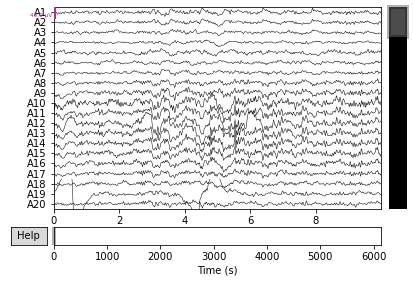

In [52]:
raw.plot();

In [54]:
events = mne.find_events(raw)

Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1050 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 1

In [55]:
events

array([[  23604,       0,     104],
       [  28127,       0,     102],
       [  32650,       0,     250],
       ...,
       [6277984,       0,     250],
       [6280715,       0,      34],
       [6285135,       0,     131]], dtype=int64)

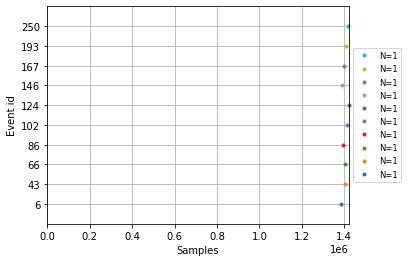

In [56]:
mne.viz.plot_events(events[240:250]);

C:\Users\TKS086\AppData\Local\Temp/ipykernel_2760/1423360370.py:1: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events[1:250]);


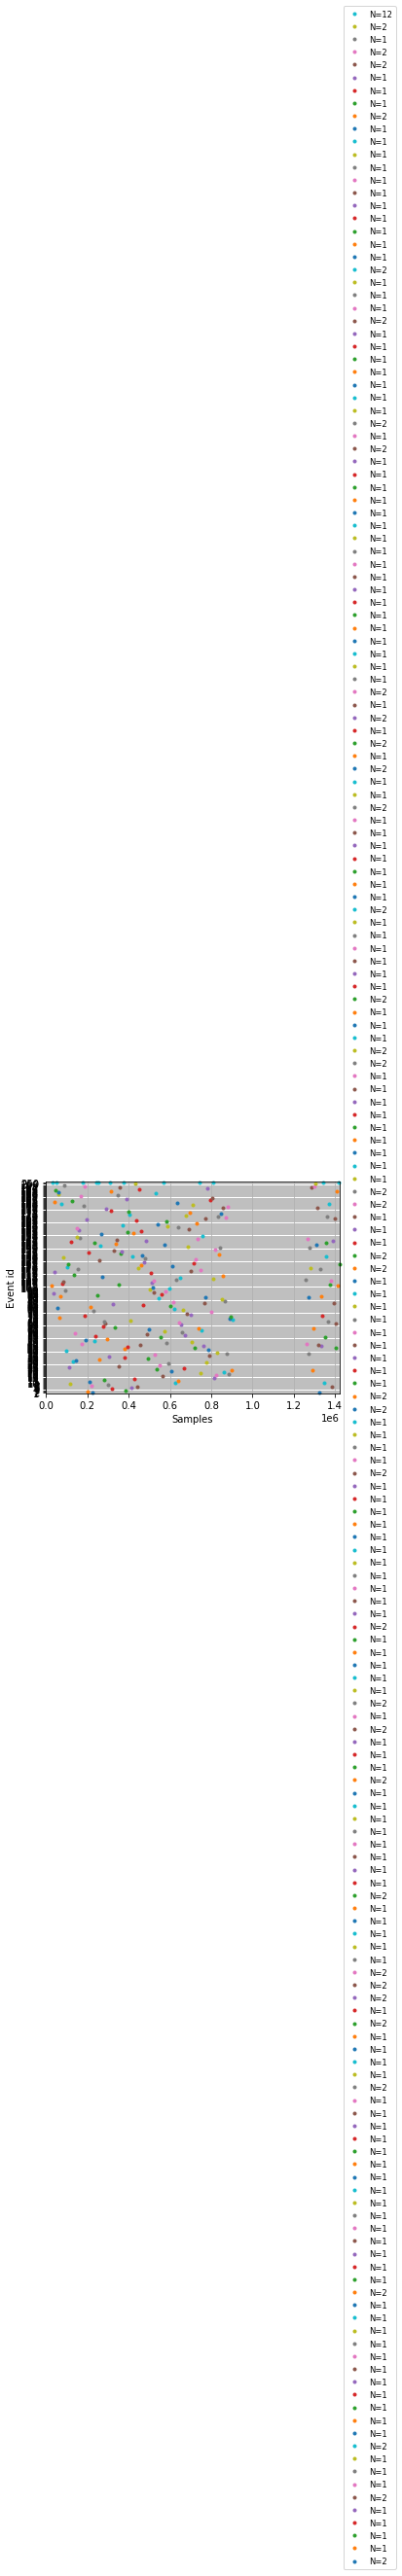

In [57]:
mne.viz.plot_events(events[1:250]);

In [58]:
event_ids = {"standard/stimulus": 2, "target/stimulus": 1}

In [59]:
epochs = mne.Epochs(raw, events, event_id=event_ids)

Not setting metadata
Not setting metadata
10 matching events found
Setting baseline interval to [-0.2001953125, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


Loading data for 10 events and 718 original time points ...
0 bad epochs dropped
Loading data for 10 events and 718 original time points ...
Loading data for 10 events and 718 original time points ...


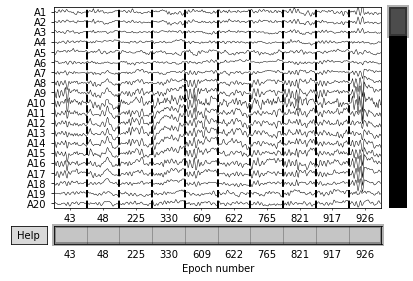

In [60]:
epochs.plot();

In [62]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)

C:\Users\TKS086\AppData\Local\Temp/ipykernel_2760/466687193.py:1: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = mne.preprocessing.ICA(n_components=20, random_state=0)


In [67]:
epochs =mne.Epochs(raw, events, event_id=event_ids, preload=True)

Not setting metadata
Not setting metadata
10 matching events found
Setting baseline interval to [-0.2001953125, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 10 events and 718 original time points ...
0 bad epochs dropped


In [69]:
epochs.apply_baseline((None,0))

Applying baseline correction (mode: mean)


Number of events,10
Events,standard/stimulus: 5target/stimulus: 5
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


In [80]:
target = epochs["target"]

In [81]:
stimulus = epochs["stimulus"]

In [82]:
del raw, epochs  # free up memory

Not setting metadata
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


C:\Users\TKS086\AppData\Local\Temp/ipykernel_2760/1019008715.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  target.plot_image(picks=['A1', 'A2'])
C:\Users\TKS086\AppData\Local\Temp/ipykernel_2760/1019008715.py:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  target.plot_image(picks=['A1', 'A2'])


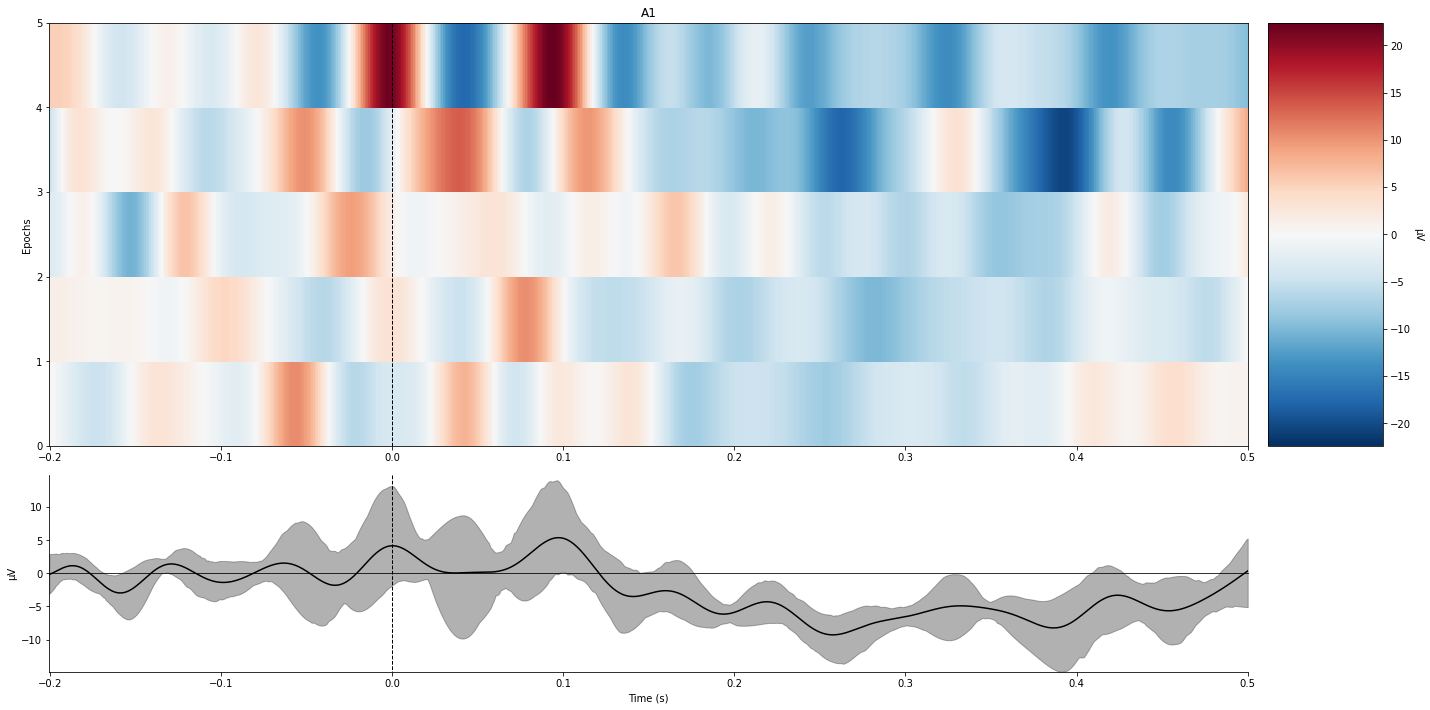

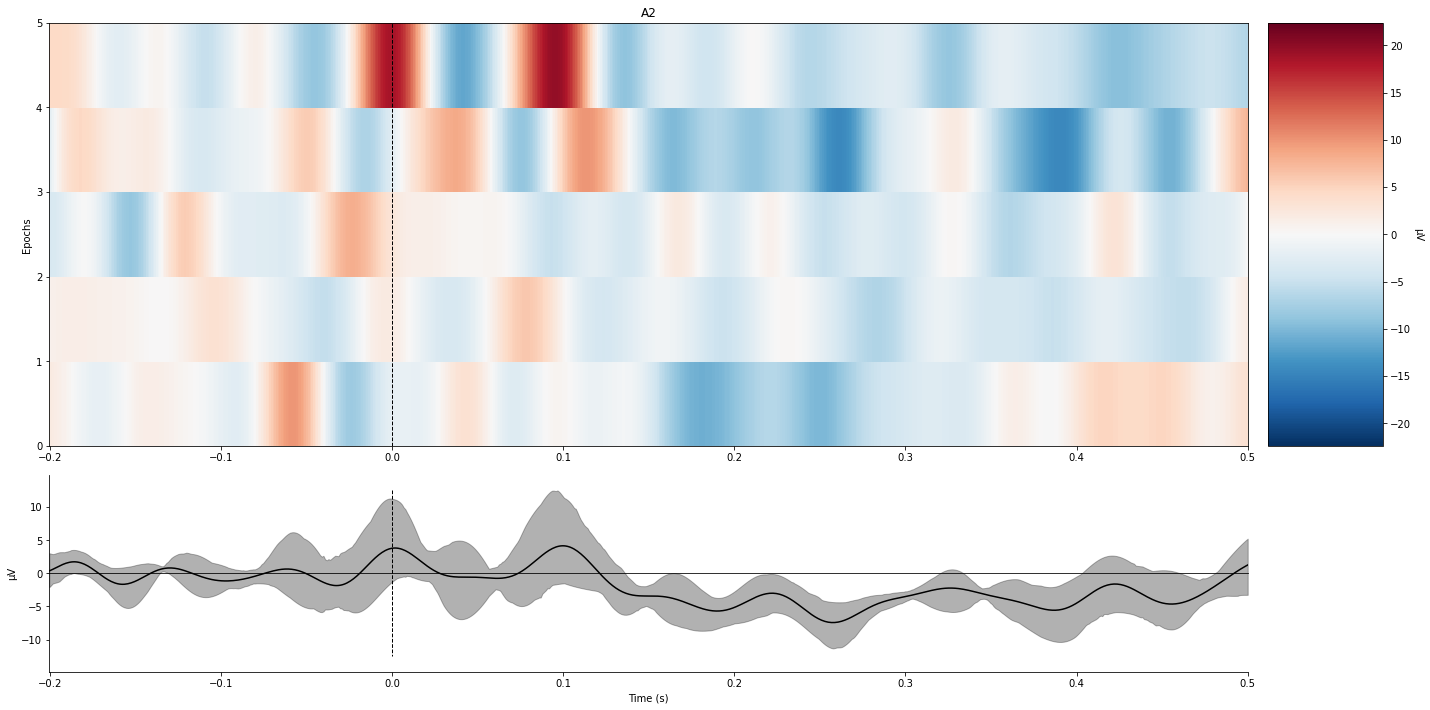

[<Figure size 1440x720 with 3 Axes>, <Figure size 1440x720 with 3 Axes>]

In [84]:
target.plot_image(picks=['A1', 'A2'])

No baseline correction applied


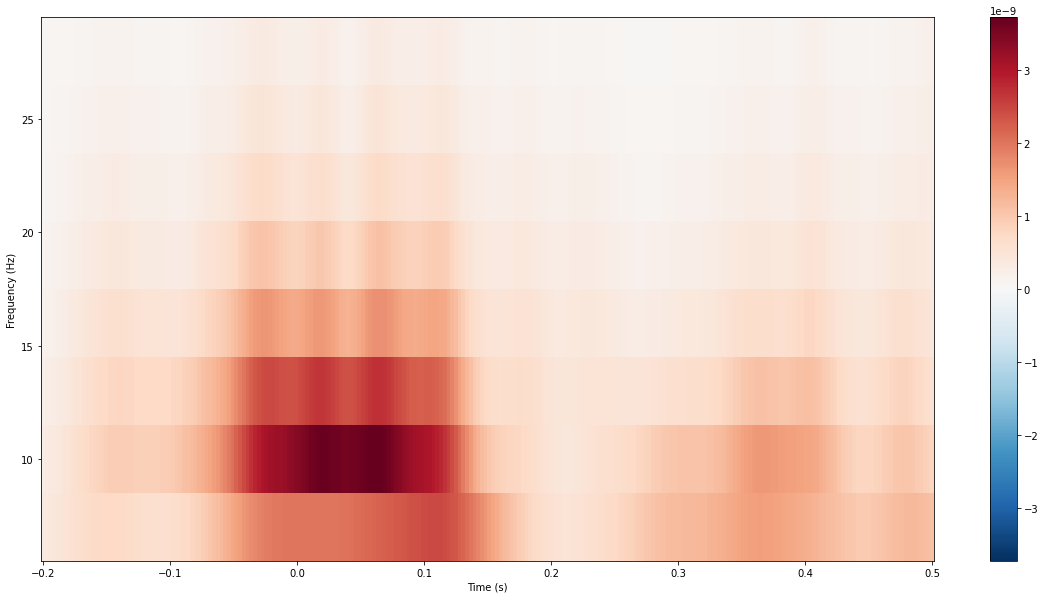

[<Figure size 1440x720 with 2 Axes>]

In [85]:
frequencies = np.arange(7, 30, 3)
power = mne.time_frequency.tfr_morlet(stimulus, n_cycles=2, return_itc=False,
                                      freqs=frequencies, decim=3)
power.plot(['A1'])

No baseline correction applied


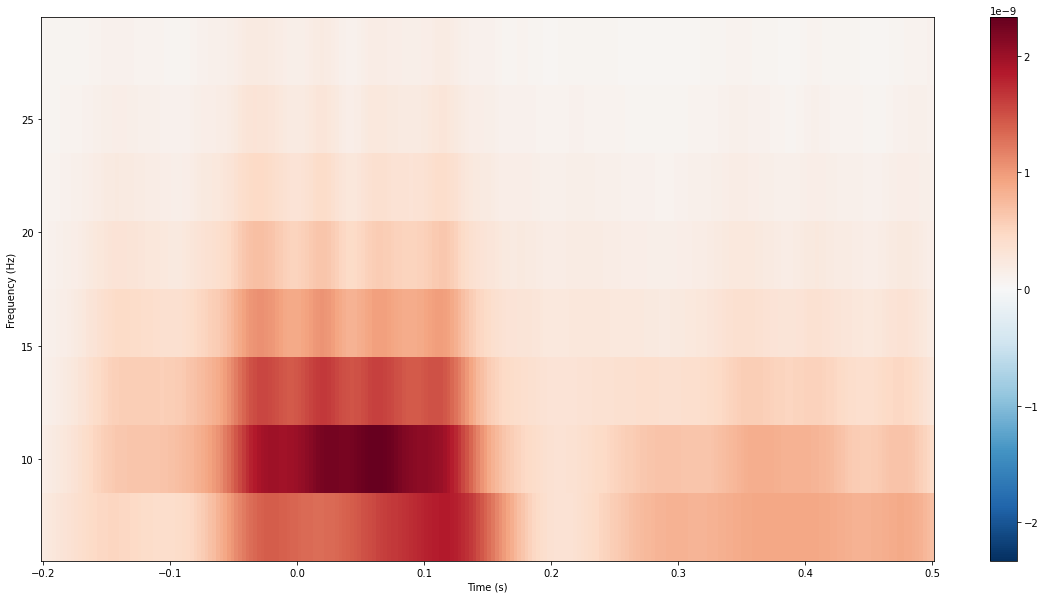

[<Figure size 1440x720 with 2 Axes>]

In [86]:
power.plot(['A2'])

No baseline correction applied


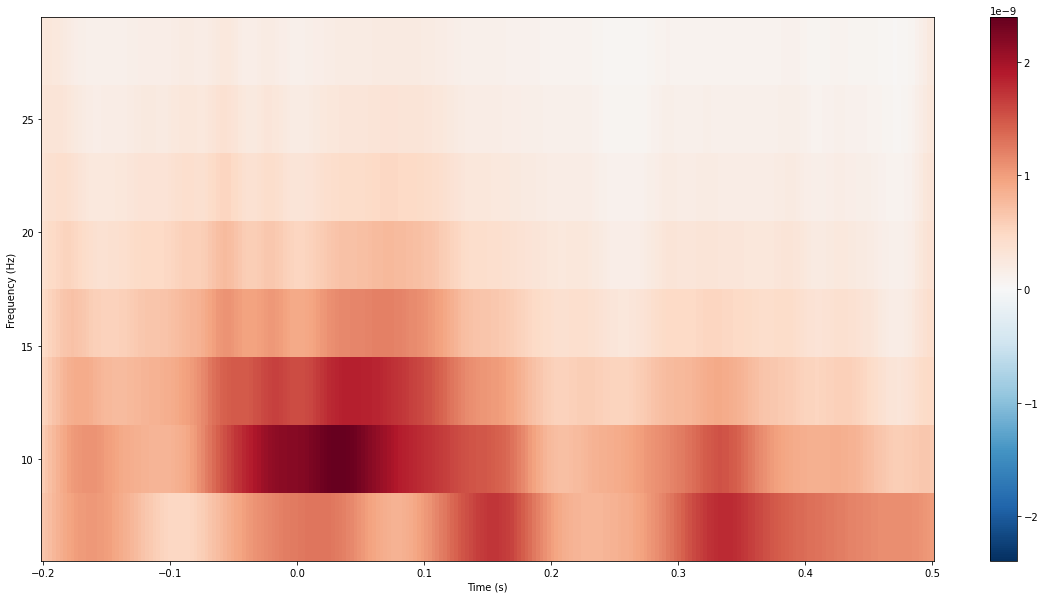

[<Figure size 1440x720 with 2 Axes>]

In [87]:
power.plot(['A20'])

combining channels using "gfp"
combining channels using "gfp"


C:\Users\TKS086\AppData\Local\Temp/ipykernel_2760/1403687912.py:4: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(dict(stim=stimulus_evoked, tar=target_evoked),


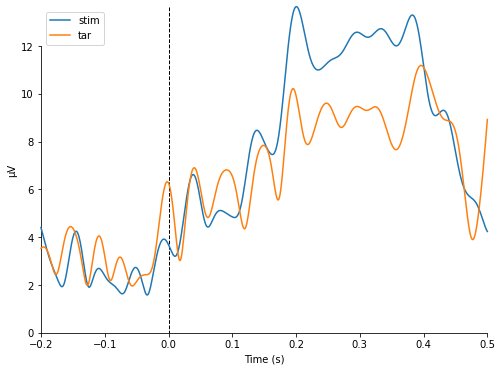

[<Figure size 576x432 with 1 Axes>]

In [88]:
stimulus_evoked = stimulus.average()
target_evoked = target.average()

mne.viz.plot_compare_evokeds(dict(stim=stimulus_evoked, tar=target_evoked),
                             legend='upper left', show_sensors='upper right')

No projector specified for this dataset. Please consider the method self.add_proj.


C:\Users\TKS086\AppData\Local\Temp/ipykernel_2760/1798902476.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  stimulus_evoked.plot_joint(picks='eeg')


RuntimeError: No digitization points found.

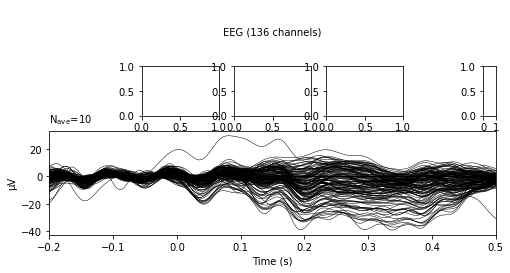

In [97]:
stimulus_evoked.plot_joint(picks='eeg')

In [91]:
stimulus_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='eeg')

RuntimeError: No digitization points found.

# Stimuli 

In [57]:
stimuli = securekit["stimuli"]
stim = pd.Series(stimuli)
#print(stim)

## 2021 data 

In [83]:
v1data21 = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\2021\Meadows_Audio-Visual_Sim_v_v1_3D.mat"

In [84]:
v1tree = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\2021\Meadows_Audio-Visual_Sim_v_v1_tree.json"

In [90]:
v1treedf = pd.read_json(v1tree)
v1treedf # 1 finished participant 

,causal-falcon
tasks,"[{'status': 'finished', 'task': {'name': 'Inst..."
token,None


In [91]:
v2data21 = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\2021\Meadows_Audio-Visual_Sim_v_v2_3D.mat"

In [92]:
v2tree = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\2021\Meadows_Audio-Visual_Sim_v_v2_tree.json"

In [93]:
v2treedf = pd.read_json(v2tree)
v2treedf

,known-spider,just-kodiak,square-wren,robust-bobcat,rare-lab,select-worm,key-ape,actual-mutt,united-viper,first-man,...,saved-falcon,large-pup,game-wasp,full-bee,still-lark,square-baboon,mint-rhino,fleet-osprey,ample-bream,pro-possum
token,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
tasks,"[{'status': 'finished', 'task': {'name': 'Inst...","[{'status': 'finished', 'task': {'name': 'Inst...","[{'status': 'finished', 'task': {'name': 'Inst...","[{'status': 'finished', 'task': {'name': 'Inst...","[{'status': 'finished', 'task': {'name': 'Inst...","[{'status': 'finished', 'task': {'name': 'Inst...","[{'status': 'finished', 'task': {'name': 'Inst...","[{'status': 'finished', 'task': {'name': 'Inst...","[{'status': 'finished', 'task': {'name': 'Inst...","[{'status': 'finished', 'task': {'name': 'Inst...",...,"[{'status': 'finished', 'task': {'name': 'Inst...","[{'status': 'finished', 'task': {'name': 'Inst...","[{'status': 'finished', 'task': {'name': 'Inst...","[{'status': 'finished', 'task': {'name': 'Inst...","[{'status': 'finished', 'task': {'name': 'Inst...","[{'status': 'finished', 'task': {'name': 'Inst...","[{'status': 'finished', 'task': {'name': 'Inst...","[{'status': 'finished', 'task': {'name': 'Inst...","[{'status': 'finished', 'task': {'name': 'Inst...","[{'status': 'finished', 'task': {'name': 'Inst..."


In [94]:
status2 = v2treedf.iloc[1,:] #all are finished 
status2

known-spider     [{'status': 'finished', 'task': {'name': 'Inst...
just-kodiak      [{'status': 'finished', 'task': {'name': 'Inst...
square-wren      [{'status': 'finished', 'task': {'name': 'Inst...
robust-bobcat    [{'status': 'finished', 'task': {'name': 'Inst...
rare-lab         [{'status': 'finished', 'task': {'name': 'Inst...
select-worm      [{'status': 'finished', 'task': {'name': 'Inst...
key-ape          [{'status': 'finished', 'task': {'name': 'Inst...
actual-mutt      [{'status': 'finished', 'task': {'name': 'Inst...
united-viper     [{'status': 'finished', 'task': {'name': 'Inst...
first-man        [{'status': 'finished', 'task': {'name': 'Inst...
clean-stork      [{'status': 'finished', 'task': {'name': 'Inst...
hot-boa          [{'status': 'finished', 'task': {'name': 'Inst...
nearby-hen       [{'status': 'finished', 'task': {'name': 'Inst...
next-oriole      [{'status': 'finished', 'task': {'name': 'Inst...
frank-iguana     [{'status': 'finished', 'task': {'name': 'Ins

In [95]:
len(status2) #31 finished participants

31

In [98]:
rsa.io.meadows.extract_filename_segments(v2data21)

{'task_scope': 'single',
 'version': '',
 'experiment_name': 'Audio-Visual',
 'structure': '3D',
 'filetype': 'mat',
 'participant_scope': 'multiple',
 'task_name': 'v2'}

In [102]:
v2data21 = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\2021\Meadows_Audio-Visual_Sim_v_v2_3D.mat"
rdmdata2 = scipy.io.loadmat(v2data21)
print(list(rdmdata2)) # we cant see rdmutv

['__header__', '__version__', '__globals__', 'dragrate_tasks', 'participation_ids', 'stimuli', 'confidence', 'property']


In [103]:
rdmdata2["participation_ids"] 

array(['known-spider ', 'just-kodiak  ', 'square-wren  ', 'robust-bobcat',
       'rare-lab     ', 'select-worm  ', 'key-ape      ', 'actual-mutt  ',
       'united-viper ', 'first-man    ', 'clean-stork  ', 'hot-boa      ',
       'nearby-hen   ', 'next-oriole  ', 'frank-iguana ', 'right-cow    ',
       'sought-teal  ', 'expert-yak   ', 'humane-caiman', 'famous-mammal',
       'fluent-grouse', 'saved-falcon ', 'large-pup    ', 'game-wasp    ',
       'full-bee     ', 'still-lark   ', 'square-baboon', 'mint-rhino   ',
       'fleet-osprey ', 'ample-bream  ', 'pro-possum   '], dtype='<U13')

In [104]:
v1data21 = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\2021\Meadows_Audio-Visual_Sim_v_v1_3D.mat"
rdmdata1 = scipy.io.loadmat(v1data21)
print(list(rdmdata1)) # we cant see rdmutv

['__header__', '__version__', '__globals__', 'dragrate_tasks', 'participation_ids', 'stimuli', 'confidence', 'property']


In [105]:
rdmdata1["participation_ids"] 

array(['causal-falcon'], dtype='<U13')

In [108]:
v1json = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\2021\Meadows_Audio-Visual_Sim_v_v1_tree.json"


In [120]:
with open(v1json) as fhandle:
        data = json.load(fhandle)

In [125]:
type(data)

dict

In [126]:
data.keys()

dict_keys(['causal-falcon'])

In [129]:
data1 = data['causal-falcon']

In [130]:
data1.keys()

dict_keys(['token', 'tasks'])

In [159]:
data2 = data1['tasks']

In [160]:
audio = data2[3]

In [161]:
type(audio)

dict

In [162]:
audio.keys()

dict_keys(['status', 'task', 'stimuli', 'trials', 'rdm', 'next_trial_stimuli', 'qualification'])

In [178]:
#audio['rdm']

In [172]:
#audio['trials']

In [217]:
#audio['stimuli']

In [165]:
T0 = audio['trials'][0]   #first trial

In [167]:
TP0 = T0['positions']

In [221]:
for i in TP0:
    ax = (i['x'])
for i in TP0:
    ay = (i['y'])

#create y array 
ly = []
for i in TP0:
    Y = ((i['y']))
    ly.append(Y)
    arry = np.array(ly)
    
#x array
lx = []
for i in TP0:
    X = ((i['x']))
    lx.append(X)
    arrx = np.array(lx)

In [194]:
arrx.shape

(50,)

In [211]:
#rrx = arrx/20
#arry = arry/20

#arrx = arrx.reshape((50,1))
#arry = arry.reshape((50,1))

import scipy
import scipy.spatial
import scipy.spatial.distance as sd
from scipy.spatial.distance import squareform

arr = np.concatenate((arrx.T,arry.T))

#euclidean distance between arrx arry points 
euc_dist = sd.pdist(arr.T, metric='euclidean') 

euc_dist = squareform(euc_dist)

#def calc_euc(arrx, arry):
    #return np.array([[np.linalg.norm(i-j) for j in arry] for i in arrx])
#euc_dist = (calc_euc(arrx, arry))


#plt.plot((euc_dist.reshape(2500,).T))

    #need to make euc_dist an array with (2500/2 - diagonal)  

#euc_dist = euc_dist.T + euc_dist - np.diag(np.diag(euc_dist))

#np.fill_diagonal(euc_dist,0, wrap=False)

ValueError: A 2-dimensional array must be passed.

In [212]:
stim = audio['stimuli']

y_names = []
for i in stim:
    y_names.append(i['name'])

x_names = []
for i in stim:
    x_names.append(i['name'])

In [213]:
euc_dist.shape

(50, 50)

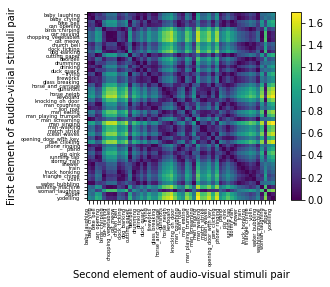

In [215]:
fig, ax = plt.subplots()

ax.set_xticks(np.arange(len(x_names)))
ax.set_yticks(np.arange(len(y_names)))

ax.set_xticklabels(x_names, fontsize = 5)
ax.set_yticklabels(y_names, fontsize = 5)  
plt.setp(ax.get_xticklabels(), rotation=90, ha="right")

plt.imshow(euc_dist)
#fig.suptitle('Representational Dissimilarity Matrix of pairs of __ stimuli')
plt.xlabel('Second element of audio-visual stimuli pair')
plt.ylabel('First element of audio-visial stimuli pair')
#plt.clim(0.0, 0.05)
plt.colorbar(mappable=None, cax=None, ax=None)
fig.subplots_adjust(bottom=0.23)

In [149]:
image = data2[4]

In [151]:
mute = data2[5]

In [153]:
video = data2[6]

In [ ]:
axis[0,0] #colorbar which axis 

In [ ]:
filepath = r"C:\Users\TKS086\Audio-visual_similarity-main\Data\Jasper.cfg"
parser = configparser.ConfigParser()
parser.sections()

In [ ]:
parser.read(filepath)

In [ ]:
parser.sections()

In [ ]:
'System' in parser

In [ ]:
for key in parser['System']:  
    print(key)

In [ ]:
'Labels' in parser

In [54]:
for key in parser['Labels']:  
    print(key)

chan1
chan2
chan3
chan4
chan5
chan6
chan7
chan8
chan9
chan10
chan11
chan12
chan13
chan14
chan15
chan16
chan17
chan18
chan19
chan20
chan21
chan22
chan23
chan24
chan25
chan26
chan27
chan28
chan29
chan30
chan31
chan32
chan33
chan34
chan35
chan36
chan37
chan38
chan39
chan40
chan41
chan42
chan43
chan44
chan45
chan46
chan47
chan48
chan49
chan50
chan51
chan52
chan53
chan54
chan55
chan56
chan57
chan58
chan59
chan60
chan61
chan62
chan63
chan64
chan65
chan66
chan67
chan68
chan69
chan70
chan71
chan72
chan73
chan74
chan75
chan76
chan77
chan78
chan79
chan80
chan81
chan82
chan83
chan84
chan85
chan86
chan87
chan88
chan89
chan90
chan91
chan92
chan93
chan94
chan95
chan96
chan97
chan98
chan99
chan100
chan101
chan102
chan103
chan104
chan105
chan106
chan107
chan108
chan109
chan110
chan111
chan112
chan113
chan114
chan115
chan116
chan117
chan118
chan119
chan120
chan121
chan122
chan123
chan124
chan125
chan126
chan127
chan128
chan129
chan130
chan131
chan132
chan133
chan134
chan135
chan136
chan137
chan138
chan

In [55]:
'Selectors' in parser

True

In [56]:
for key in parser['Selectors']:  
    print(key)

screenlength
filelimit
fileappend
rectimelimit
decimation
buffer
monscale
monlp
monlpfreq
monhp
monhpfreq
channels
addtp
reference
trigcode
bipscale
biplp
biplpfreq
biphp
biphpfreq
offset
offsetscale
avgtriglog
avgsweep
avglp
avglpfreq
avghp
avghpfreq
avgautoscale
avgscale
avgabsreject
avgrelreject
gsrscale
ergoscale
ergolp
respscale
pletscale
tempscale
auxreset
jazzon
jazzreset
anascale
analp
analpfreq
anahp
anahpfreq
anareset
anaoffset


In [57]:
'FreeChoice' in parser

True

In [58]:
for key in parser['FreeChoice']:  
    print(key)

monfree
reffree
bipfree
avgtrigsel
monfreeavg1
reffreeavg1
monfreeavg2
reffreeavg2
auxfree
jazzfree
anafree


In [59]:
'Save' in parser

True

In [60]:
for key in parser['Save']:  
    print(key)

subset
touchproofs
sensors
jazz
anas
savebox
pauseoff
pauseon
savepath


In [61]:
parser['Save']['savepath']

'C:\\BDFdata\\Testdata.bdf'

In [62]:
'TCP' in parser

True

In [63]:
for key in parser['TCP']:  
    print(key)

localport
tcpsubset
tcpaddtp
tcpaddsens
tcpaddjazz
tcpaddanas
tcpaddtrig
